In [2]:
# Importing the librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder


<h1> Importing the BigMart Sales Dataset

In [3]:
# loading the data from csv file to a Pandas dataframe
BigMart_Sales_dataset = pd.read_csv('Train.csv')

In [4]:
# first 5 rows of the dataframe
BigMart_Sales_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# number of rows and columns
BigMart_Sales_dataset.shape

(8523, 12)

In [6]:
# Informations about the dataset
BigMart_Sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# checking for missing values
BigMart_Sales_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<h1>
Handling the missing values


<h4> Replacing the missing values of the column 'Item_Weight ' with mean  

In [8]:

# mean value of the "item_weight" column
mean_item_weight= BigMart_Sales_dataset['Item_Weight'].mean()
print(mean_item_weight)

12.857645184135976


In [9]:
# filling the missing values in "item_weight" column with the mean value*
BigMart_Sales_dataset['Item_Weight'].fillna(mean_item_weight,inplace=True)

In [10]:
BigMart_Sales_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<h4> Replacing the missing values of the column 'Outlet_Size ' with mode 

In [11]:

# mode value of the "Outlet_Size " column
mode_of_Outlet_Size = BigMart_Sales_dataset.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))


In [12]:
print(mode_of_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
missing_values = BigMart_Sales_dataset['Outlet_Size'].isnull()

In [14]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
BigMart_Sales_dataset.loc[missing_values, 'Outlet_Size']= BigMart_Sales_dataset.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_Size)

In [16]:
BigMart_Sales_dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<h5> So now we dealed with all the missing data

In [17]:
BigMart_Sales_dataset.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
#sns.set()

<Figure size 600x600 with 0 Axes>

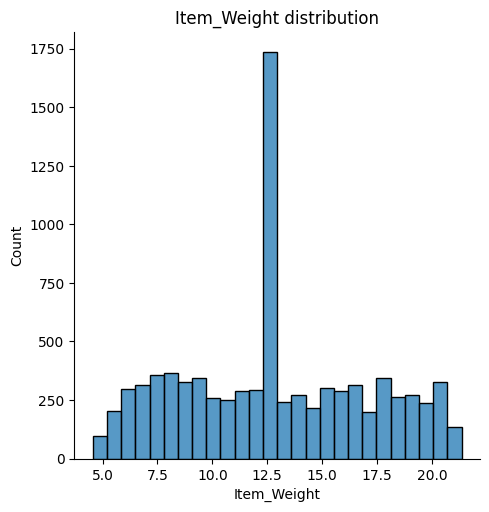

In [19]:
# plot for item_weight column
plt.figure(figsize=(6,6))
sns.displot(BigMart_Sales_dataset['Item_Weight'])
plt.title('Item_Weight distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

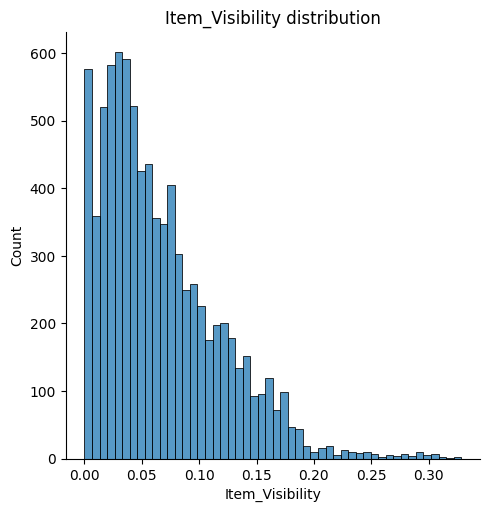

In [20]:
# plot for Item_Visibility column
plt.figure(figsize=(6,6))
sns.displot(BigMart_Sales_dataset['Item_Visibility'])
plt.title('Item_Visibility distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

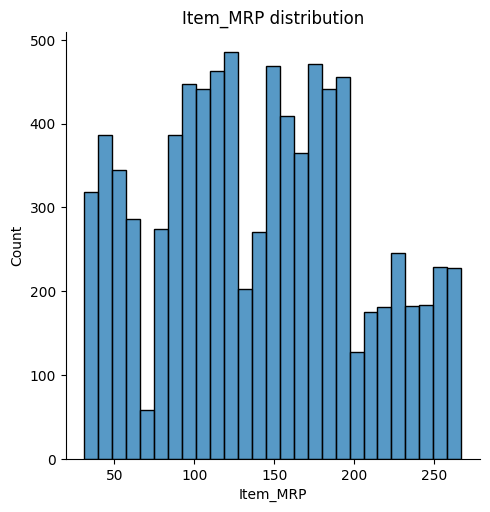

In [21]:
# plot for Item_MRP column
plt.figure(figsize=(6,6))
sns.displot(BigMart_Sales_dataset['Item_MRP'])
plt.title('Item_MRP distribution')
plt.show()

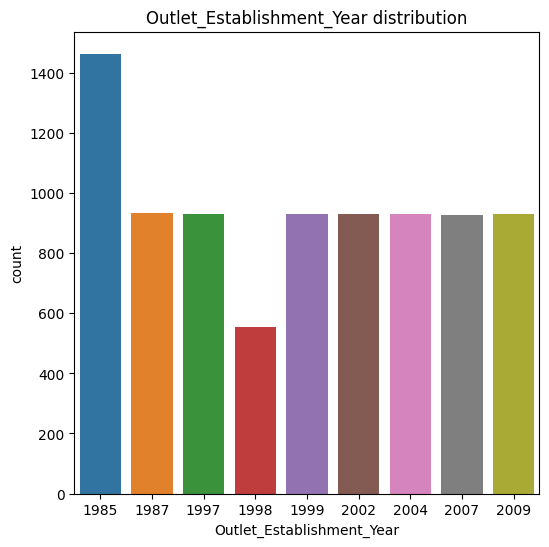

In [22]:
# plot for Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(data=BigMart_Sales_dataset,x='Outlet_Establishment_Year')
plt.title('Outlet_Establishment_Year distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

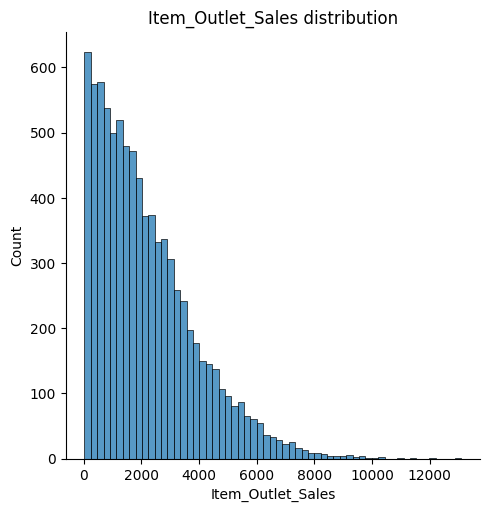

In [23]:
# plot for Item_Outlet_Sales column
plt.figure(figsize=(6,6))
sns.displot(BigMart_Sales_dataset['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales distribution')
plt.show()

<h1> Categorical features

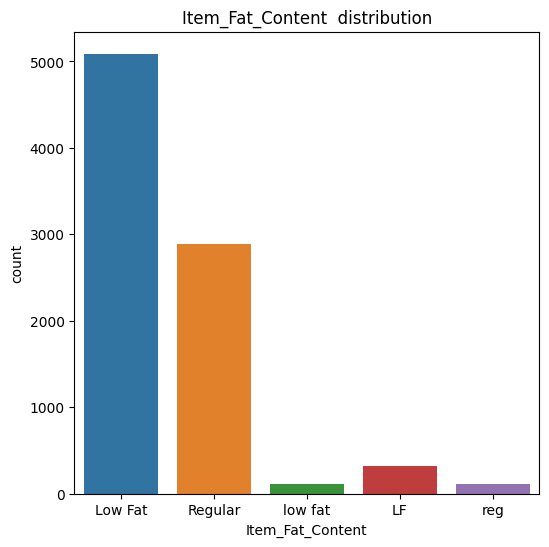

In [24]:
# plot for Item_Fat_Content  column
plt.figure(figsize=(6,6))
sns.countplot(data=BigMart_Sales_dataset,x='Item_Fat_Content')
plt.title('Item_Fat_Content  distribution')
plt.show()

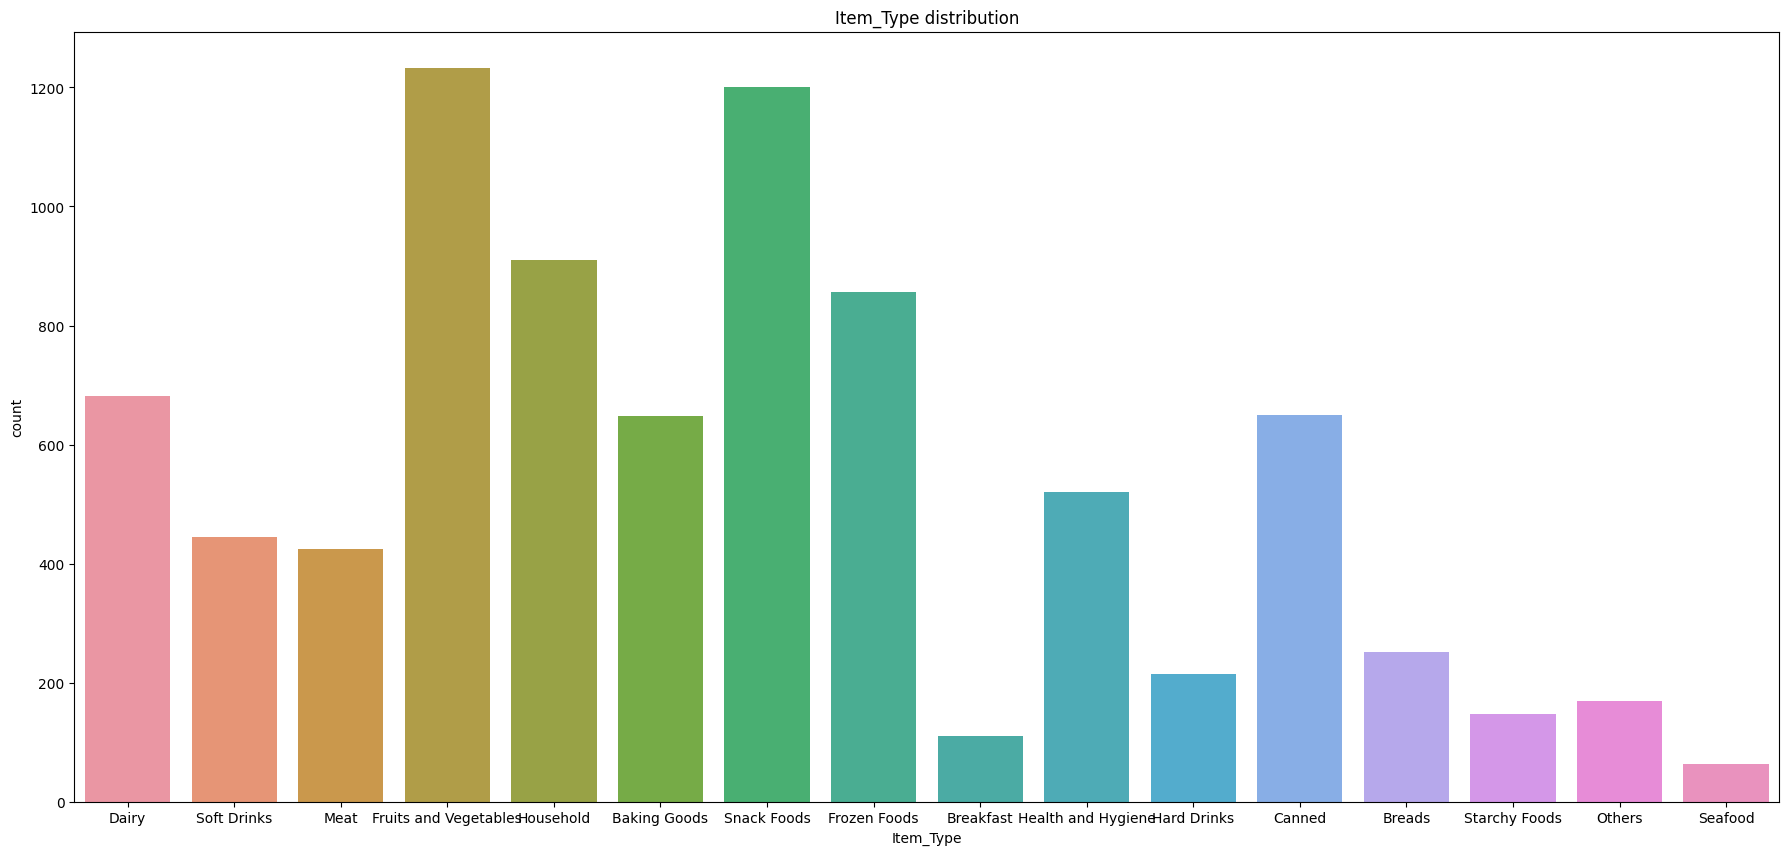

In [25]:
# plot for Item_Type column
plt.figure(figsize=(22,10))
sns.countplot(data=BigMart_Sales_dataset,x='Item_Type')
plt.title('Item_Type distribution')
plt.show()

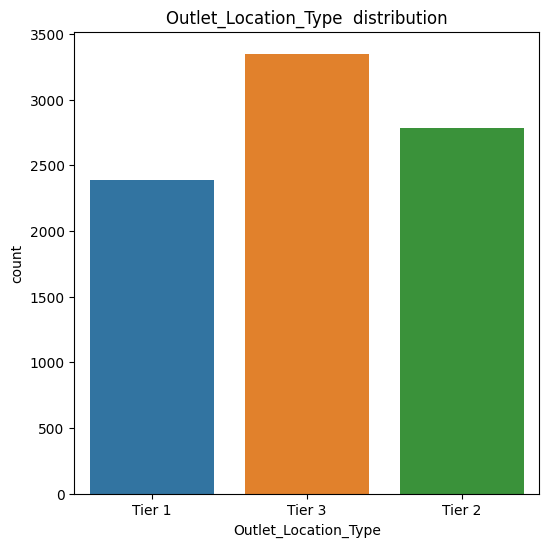

In [26]:
# plot for Outlet_Location_Type column
plt.figure(figsize=(6,6))
sns.countplot(data=BigMart_Sales_dataset,x='Outlet_Location_Type')
plt.title('Outlet_Location_Type  distribution')
plt.show()   


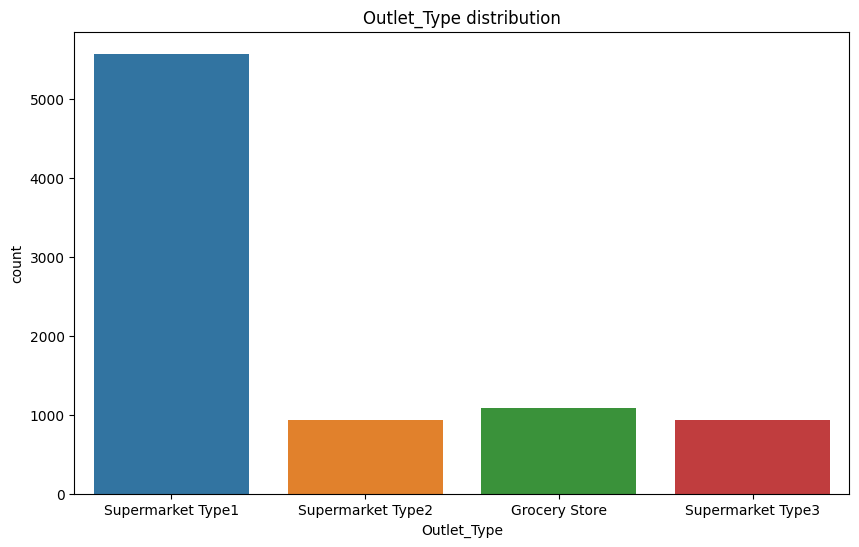

In [27]:
# plot for Outlet_Type column
plt.figure(figsize=(10,6))
sns.countplot(data=BigMart_Sales_dataset,x='Outlet_Type')
plt.title('Outlet_Type distribution')
plt.show()

<h1> Data Pre-Processing

In [28]:
BigMart_Sales_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<h3> We need to convert categorical data into numerical data

In [29]:
BigMart_Sales_dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
# First and before encoding we need to write all the categories in the same way LF== low fat==Low Fat
BigMart_Sales_dataset.replace({'Item_Fat_Content':{'low fat':'Low Fat' , 'LF':'Low Fat' , 'reg':'Regular'}},inplace=True)

In [31]:
BigMart_Sales_dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<h3> label encoding 

In [32]:
encoder = LabelEncoder() # => each categorical value is converted to a unique numerical value

In [33]:
BigMart_Sales_dataset['Item_Identifier'] = encoder.fit_transform(BigMart_Sales_dataset['Item_Identifier'])

In [34]:
BigMart_Sales_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,1297,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
# we will do the same to the other categorical values

BigMart_Sales_dataset['Item_Fat_Content'] = encoder.fit_transform(BigMart_Sales_dataset['Item_Fat_Content'])




In [36]:
BigMart_Sales_dataset['Item_Type'] = encoder.fit_transform(BigMart_Sales_dataset['Item_Type'])



In [37]:
BigMart_Sales_dataset['Outlet_Identifier'] = encoder.fit_transform(BigMart_Sales_dataset['Outlet_Identifier'])



In [38]:
# before we encode this categorical column we need to change [grocery store] to grocery store
BigMart_Sales_dataset['Outlet_Size'].value_counts()
# let's check the transformations
BigMart_Sales_dataset['Outlet_Size'].value_counts()

Medium             2793
[Grocery Store]    2410
Small              2388
High                932
Name: Outlet_Size, dtype: int64

In [39]:
BigMart_Sales_dataset['Outlet_Location_Type'] = encoder.fit_transform(BigMart_Sales_dataset['Outlet_Location_Type'])



In [40]:
BigMart_Sales_dataset['Outlet__Type'] = encoder.fit_transform(BigMart_Sales_dataset['Outlet_Type'])


In [41]:
BigMart_Sales_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet__Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,Supermarket Type1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,Supermarket Type2,443.4228,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,Supermarket Type1,2097.2700,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,Grocery Store,732.3800,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,Supermarket Type1,994.7052,1


<h3> Sppliting features and Target

In [42]:
X = BigMart_Sales_dataset.drop(columns='Item_Outlet_Sales', axis=1)
Y = BigMart_Sales_dataset['Item_Outlet_Sales']

In [43]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet__Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,Medium,0,Supermarket Type1,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,Medium,2,Supermarket Type2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,Medium,0,Supermarket Type1,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,Grocery Store,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,High,2,Supermarket Type1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,High,2,Supermarket Type1,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,1,Supermarket Type1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,Small,1,Supermarket Type1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,Medium,2,Supermarket Type2,2


In [44]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 12) (6818, 12) (1705, 12)


<h3> XGBoost Regressor()

In [47]:
regressor = XGBRegressor()

In [48]:
regressor.fit(X_train, Y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Outlet_Size: object, Outlet_Type: object

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train) #R Squared value =  0.6364457030941357

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test) #R Squared value =  0.5867640914432671